<h1>Outliers</h1>

In this notebook, i will create a random forest regressor to predict the amount of days that a person will stay in a hotel. To do that, first i will analyze the data, and prepare it. Next, i will train the model and validate it.

In [269]:
import pandas as pd
from qgrid import show_grid
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import ResidualsPlot
from scipy.stats.mstats import winsorize
from ipynb.fs.full.funPyModeling import status, profiling_num

<h3>Data Loading</h3>

In [270]:
data = pd.read_csv("data/hotels.csv", sep = ",")

<h3>Dataset Status</h3>

In [271]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,hotel,0,0.000000,0,0.000000,2,object
1,is_canceled,0,0.000000,75166,0.629584,2,int64
2,lead_time,0,0.000000,6345,0.053145,479,int64
3,arrival_date_year,0,0.000000,0,0.000000,3,int64
4,arrival_date_month,0,0.000000,0,0.000000,12,object
5,arrival_date_week_number,0,0.000000,0,0.000000,53,int64
6,arrival_date_day_of_month,0,0.000000,0,0.000000,31,int64
7,stays_in_weekend_nights,0,0.000000,51998,0.435531,17,int64
8,stays_in_week_nights,0,0.000000,7645,0.064034,35,int64
9,adults,0,0.000000,403,0.003375,14,int64


There are NaNs in 'country', 'agent' and 'company'.

<h3>Data Preparation</h3>

Variables selection.

In [272]:
data2 = data[['adults', 'children','babies','total_of_special_requests','deposit_type','customer_type', 'stays_in_weekend_nights', 'stays_in_week_nights', 'required_car_parking_spaces','arrival_date_month',
'arrival_date_day_of_month','hotel', 'lead_time']].copy()

Target and features separation

In [273]:
data2['total_stay'] = data2['stays_in_week_nights'] + data2['stays_in_weekend_nights']

data3 = data2.drop(['stays_in_week_nights','stays_in_weekend_nights'], axis=1)

The total stay days will be the stay in week nights days, plus, the stays in weekend nights.

In [274]:
data3['children'].fillna(data3['children'].mean(), inplace = True)

data4=pd.get_dummies(data3, drop_first=True)

data4=data4[data4['total_stay']>0].copy()

In [275]:
x_data = data4.drop('total_stay', axis=1)
y_data = data4['total_stay']

Training set and test set separation

In [276]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

<h3>Model Creation (Random Forest)</h3>

In [277]:
model_rf = RandomForestRegressor(n_estimators=1000, max_features=2, min_samples_leaf=20, min_samples_split=40)

In [278]:
model_rf.fit(x_train, y_train)

RandomForestRegressor(max_features=2, min_samples_leaf=20, min_samples_split=40,
                      n_estimators=1000)

<h3>Models Validation</h3>

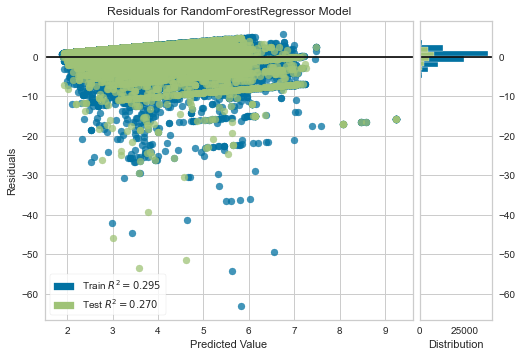

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [279]:
vis_res = ResidualsPlot(model_rf)

vis_res.fit(x_train, y_train)
vis_res.score(x_test, y_test)
vis_res.show()

The graphic from the residual plot doesnt show a normal distribution, so, i will analyze the outliers, and then, the hyperparameters of the model.

<h3>Outliers Analysis</h3>

array([[<AxesSubplot:title={'center':'adults'}>,
        <AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'total_of_special_requests'}>,
        <AxesSubplot:title={'center':'required_car_parking_spaces'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'total_stay'}>,
        <AxesSubplot:title={'center':'deposit_type_Non Refund'}>,
        <AxesSubplot:title={'center':'deposit_type_Refundable'}>],
       [<AxesSubplot:title={'center':'customer_type_Group'}>,
        <AxesSubplot:title={'center':'customer_type_Transient'}>,
        <AxesSubplot:title={'center':'customer_type_Transient-Party'}>,
        <AxesSubplot:title={'center':'arrival_date_month_August'}>,
        <AxesSubplot:title={'center':'arrival_date_month_December'}>],
       [<AxesSubplot:title={'center':'arrival_date_month_February'}

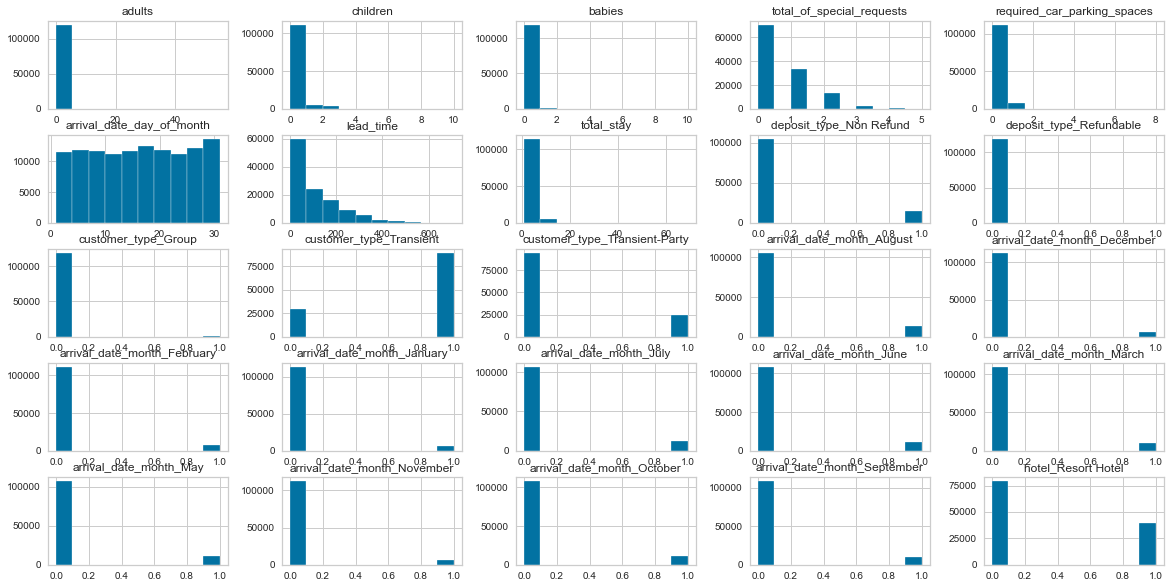

In [280]:
data4.hist(figsize=(20,10))

In [281]:
profiling_num(data4)[['variable', 'mean', 'std_dev', 'variation_coef']].sort_values('variation_coef', ascending=False)

,variable,mean,std_dev,variation_coef
2,babies,0.007954,0.097515,12.259097
4,required_car_parking_spaces,0.062751,0.245726,3.915878
1,children,0.104103,0.398946,3.832227
3,total_of_special_requests,0.571797,0.793186,1.387181
6,lead_time,104.466484,106.905957,1.023352
7,total_stay,3.448553,2.551211,0.739792
5,arrival_date_day_of_month,15.799199,8.782231,0.555866
0,adults,1.858285,0.577953,0.311014


I see that in some variables, the variation coefficient is bigger than one, so, i will apply winsorize.

Applying winsorize.

In [282]:
cols_to_stop=['total_of_special_requests', 'required_car_parking_spaces', 'children', 'lead_time']

This are the columns where i will apply winsorize.

In [283]:
x_data2 = x_data.copy()

In [284]:
for col in cols_to_stop: 
     x_data2[col] = winsorize(x_data[col], limits=[None, 0.03])

In [285]:
y_data2 = winsorize(y_data, limits=[None, 0.03])

In [286]:
profiling_num(x_data2)[['variable', 'mean', 'std_dev', 'variation_coef']].sort_values('variation_coef', ascending=False)

,variable,mean,std_dev,variation_coef
2,babies,0.007954,0.097515,12.259097
4,required_car_parking_spaces,0.062347,0.241785,3.878074
1,children,0.103395,0.394073,3.811335
3,total_of_special_requests,0.544108,0.716829,1.317439
6,lead_time,102.238475,100.048572,0.978580
5,arrival_date_day_of_month,15.799199,8.782231,0.555866
0,adults,1.858285,0.577953,0.311014


Now, the variation coefficients are a bit lower.

<h3>Model Creation (with treated outliers)</h3>

Training set and test set separation.

In [287]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data2, y_data2, test_size=0.2)

In [288]:
model_rf2 = RandomForestRegressor(n_estimators=1000, max_features=2, min_samples_leaf=20, min_samples_split=40)

In [289]:
model_rf2.fit(x_train2, y_train2)

RandomForestRegressor(max_features=2, min_samples_leaf=20, min_samples_split=40,
                      n_estimators=1000)

<h3>Models Validation</h3>

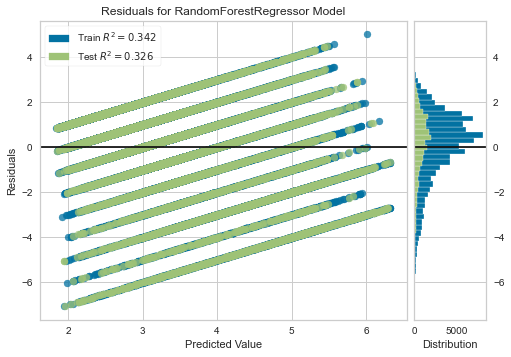

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [290]:
vis_res2 = ResidualsPlot(model_rf2)

vis_res2.fit(x_train2, y_train2)
vis_res2.score(x_test2, y_test2)
vis_res2.show()

Treating the outliers, makes the model (with the same hyperparameters) has a better performance. Now the residual plot shows a normal distribution, centered at 0.